<a href="https://colab.research.google.com/github/yohanesnuwara/pyBORACS/blob/main/pyboracs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyBORACS - Python Borehole Acoustic Simulation

In [1]:
!git clone https://github.com/yohanesnuwara/pyboracs

Cloning into 'pyboracs'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 26 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20

import sys
sys.path.append('/content/pyboracs')

from pyboracs import *

In [3]:
# Input
nx = 200      # grid points in x
nz = 200      # grid points in z
nt = 850      # number of time steps
dx = 10       # grid increment in x 
dt = 0.0006   # Time step
c0 = 3000     # velocity (can be an array) 
isx = nx // 2 # source index x 
isz = nz // 2 # source index z 
ist = 100     # shifting of source time function
f0 = 100      # dominant frequency of source (Hz)
isnap = 10    # snapshot frequency

# Receiver locations
irx = np.array([100, 100, 100, 100, 100, 100, 100, 100])
irz = np.array([10, 15, 20, 25, 30, 35, 40, 45])

## Homogeneous model (no borehole)

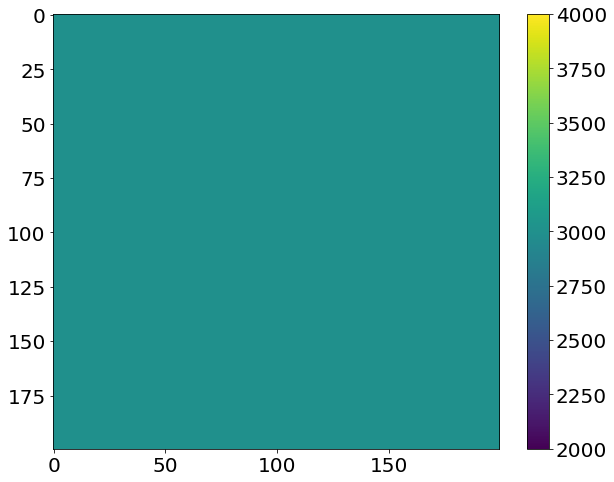

In [4]:
# Formation model
c0 = 3000
model = velmodel(nx, nz)
model.homogeneous(c0)

plt.figure(figsize=(10,8))
plt.imshow(model.vel, aspect='auto', vmin=2000, vmax=4000, cmap='viridis')
plt.colorbar()

plt.show()

In [5]:
pnew, seis = borehole_ac2d(model.vel, nx, nz, nt, dx, dt, isx, isz, irx, irz, ist, f0)

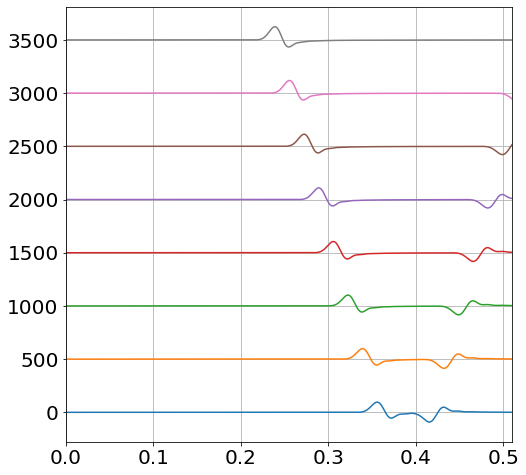

In [6]:
t = np.linspace(0,nt*dt,nt)

plt.figure(figsize=(8,8))
for i in range(len(seis)):
  plt.plot(t,seis[i]+i*500)

plt.xlim(0,nt*dt)
plt.grid()
plt.show()

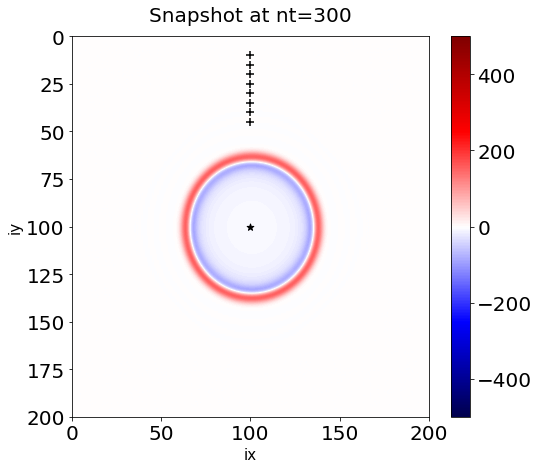

In [7]:
# Make snapshot
timestep = 300

plt.figure(figsize=(8,7))

plt.imshow(pnew[timestep-1], interpolation='lanczos', animated=True,
           extent=(0,nx,nz,0), aspect="auto", vmin=-500, vmax=500, cmap='seismic')
plt.colorbar()
plt.title("Snapshot at nt={}".format(timestep), size=20, pad=15)
plt.xlabel("ix", size=15); plt.ylabel("iy", size=15)

plt.scatter(irx, irz, marker="+", color="black", s=50)
plt.scatter(isx, isz, marker="*", color="black", s=50)

plt.show()

## Open hole with mudcake and invaded zone

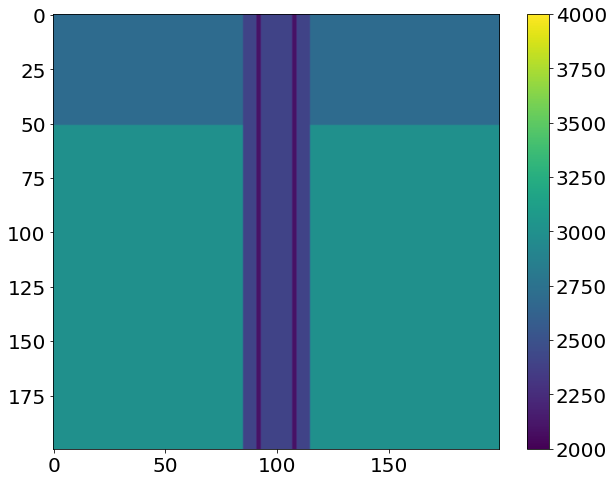

In [8]:
# Formation model
c0 = 3000
model = velmodel(nx, nz)
model.homogeneous(c0)

# Water level
model.owc(c_oilsat=0.9*c0, location=51)

# Casedhole model
model.invadedzone(c_invade=0.8*c0)
model.mud(c_mud=0.7*c0)
# model.casing(c_casing=2*c0)
model.openhole(c_drfl=0.8*c0)

plt.figure(figsize=(10,8))
plt.imshow(model.vel, aspect='auto', vmin=2000, vmax=4000, cmap='viridis')
plt.colorbar()

plt.show()

In [9]:
pnew, seis = borehole_ac2d(model.vel, nx, nz, nt, dx, dt, isx, isz, irx, irz, ist, f0)

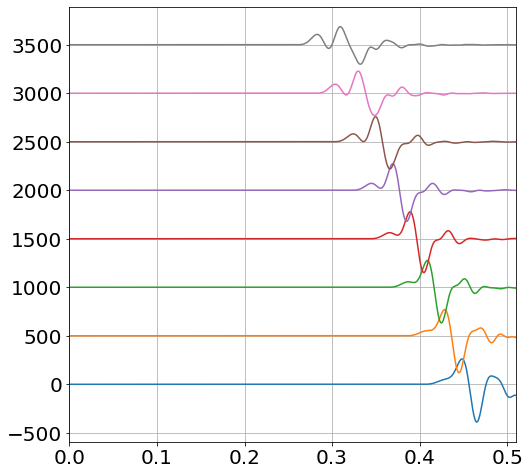

In [10]:
t = np.linspace(0,nt*dt,nt)

plt.figure(figsize=(8,8))
for i in range(len(seis)):
  plt.plot(t,seis[i]+i*500)

plt.xlim(0,nt*dt)
plt.grid()
plt.show()

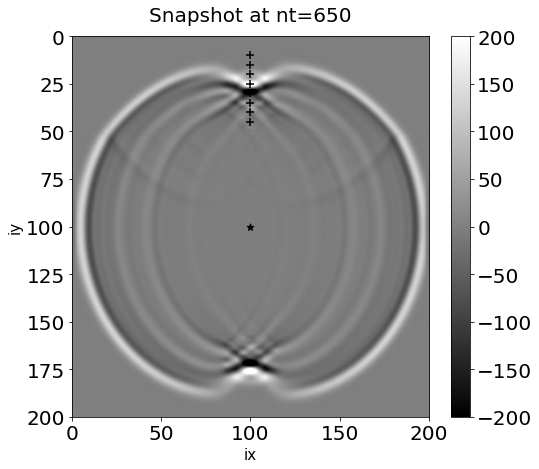

In [11]:
# Make snapshot
timestep = 650

plt.figure(figsize=(8,7))

plt.imshow(pnew[timestep-1], interpolation='lanczos', animated=True,
           extent=(0,nx,nz,0), aspect="auto", vmin=-200, vmax=200, cmap='gray')
plt.colorbar()
plt.title("Snapshot at nt={}".format(timestep), size=20, pad=15)
plt.xlabel("ix", size=15); plt.ylabel("iy", size=15)

plt.scatter(irx, irz, marker="+", color="black", s=50)
plt.scatter(isx, isz, marker="*", color="black", s=50)

plt.show()

## Cased hole with washouts, fractured, shale lamination, and oil-water contact

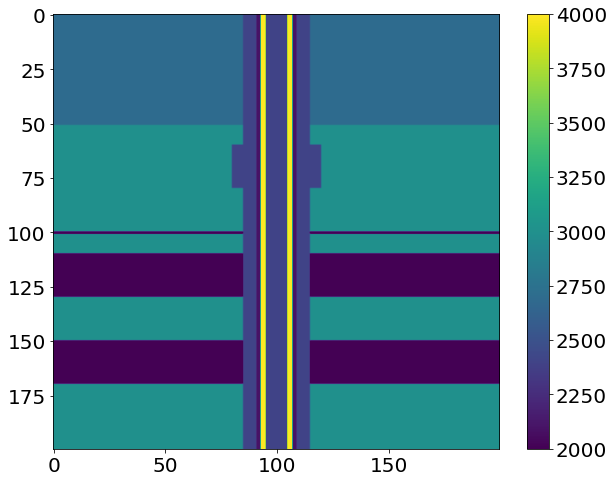

In [12]:
# Formation model
c0 = 3000
model = velmodel(nx, nz)
model.homogeneous(c0)
model.fracture(c_lowvel=0.5*c0, location=100)
model.laminae(c_laminae=0.6*c0, location=110, thickness=20) # Shale laminae
model.laminae(c_laminae=0.6*c0, location=150, thickness=20) # Shale laminae

# Water level
model.owc(c_oilsat=0.9*c0, location=51)

# Casedhole model
model.invadedzone(c_invade=0.8*c0)
model.mud(c_mud=0.7*c0)
model.casing(c_casing=2*c0)
model.cement(c_cement=0.8*c0)
model.washout(c_cement=0.8*c0)

plt.figure(figsize=(10,8))
plt.imshow(model.vel, aspect='auto', vmin=2000, vmax=4000, cmap='viridis')
plt.colorbar()

plt.show()

In [13]:
pnew, seis = borehole_ac2d(model.vel, nx, nz, nt, dx, dt, isx, isz, irx, irz, ist, f0)

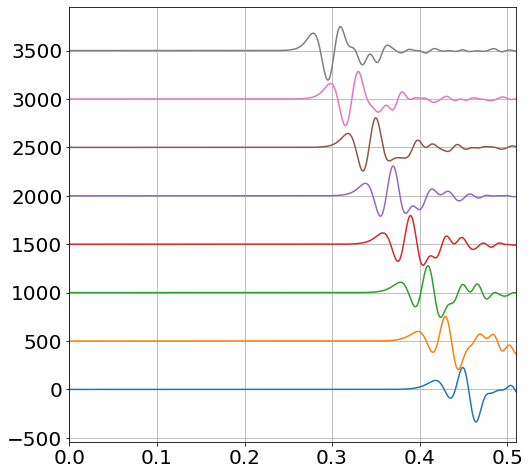

In [14]:
t = np.linspace(0,nt*dt,nt)

plt.figure(figsize=(8,8))
for i in range(len(seis)):
  plt.plot(t,seis[i]+i*500)

plt.xlim(0,nt*dt)
plt.grid()
plt.show()

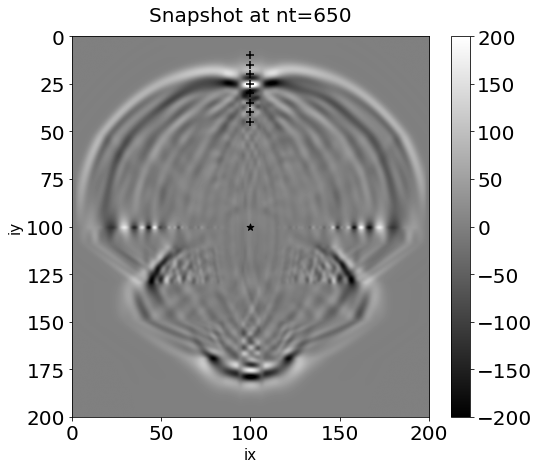

In [15]:
# Make snapshot
timestep = 650

plt.figure(figsize=(8,7))

plt.imshow(pnew[timestep-1], interpolation='lanczos', animated=True,
           extent=(0,nx,nz,0), aspect="auto", vmin=-200, vmax=200, cmap='gray')
plt.colorbar()
plt.title("Snapshot at nt={}".format(timestep), size=20, pad=15)
plt.xlabel("ix", size=15); plt.ylabel("iy", size=15)

plt.scatter(irx, irz, marker="+", color="black", s=50)
plt.scatter(isx, isz, marker="*", color="black", s=50)

plt.show()

In [16]:
from matplotlib import animation
from IPython.display import HTML

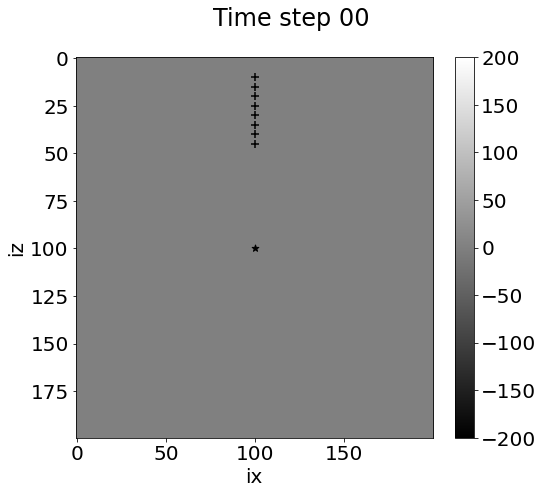

In [17]:
def animate(pnew, isx, isz, irx, irz, nt, interval):
  # Initialize plot
  p0 = np.empty((nx,nz))

  fig = plt.figure(figsize=(8,7))
  plt.xlabel('ix')
  plt.ylabel('iz')

  plt.scatter(irx, irz, marker="+", color="black", s=50)
  plt.scatter(isx, isz, marker="*", color="black", s=50)

  plot = plt.imshow(p0, cmap='gray', aspect='auto', vmin=-200, vmax=200)
  plt.colorbar()  

  def update_plot(n, u_hist):
    fig.suptitle('Time step {:0>2}'.format(n))
    plot.set_data(u_hist[n])

  # Create movie
  anim = animation.FuncAnimation(fig, update_plot, frames=nt, fargs=(pnew,),
                                 interval=interval)
  return anim

anim = animate(pnew, isx, isz, irx, irz, nt=650, interval=100)

In [18]:
# Display the video
HTML(anim.to_html5_video())